In [315]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import pandas_datareader as pdr
from datetime import datetime

In [316]:
oil_comp=['CNQ','DVN','COP','XOM']

In [317]:
end = datetime.now()
start=datetime(end.year-2,end.month,end.day)


In [318]:
for stock in oil_comp:
    globals()[stock]=pdr.DataReader(stock,data_source='yahoo',
                                    start=start,end=end)

In [319]:
oil_comp

['CNQ', 'DVN', 'COP', 'XOM']

In [320]:
CNQ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-16,29.450001,28.809999,28.850000,29.350000,4500900.0,25.883272
2018-10-17,29.240000,28.420000,29.240000,28.639999,4300700.0,25.257135
2018-10-18,28.350000,27.959999,28.309999,28.309999,2715500.0,24.966116
2018-10-19,28.700001,28.309999,28.360001,28.340000,2974200.0,24.992571
2018-10-22,28.790001,28.120001,28.370001,28.600000,5083500.0,25.221861


In [321]:
CNQ.describe()

,High,Low,Open,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,24.433525,23.653257,24.050238,24.028218,3.506218e+06,22.193599
std,5.390580,5.512330,5.439537,5.452107,2.243770e+06,4.587938
min,8.000000,6.710000,7.850000,7.740000,6.975000e+05,7.261243
25%,19.440001,18.520000,18.910000,18.990000,2.142800e+06,18.658981
50%,26.440001,25.660000,26.120001,26.000000,2.946500e+06,23.677759
75%,28.219999,27.530001,27.840000,27.860001,4.175600e+06,25.118158
max,32.790001,32.130001,32.369999,32.380001,2.379660e+07,30.143469


In [322]:
WTI=pdr.DataReader('DCOILWTICO',data_source='fred',start=start,end=end)

<AxesSubplot:label='9922119f-a08f-46d1-b6b9-6260c2010d3f'>

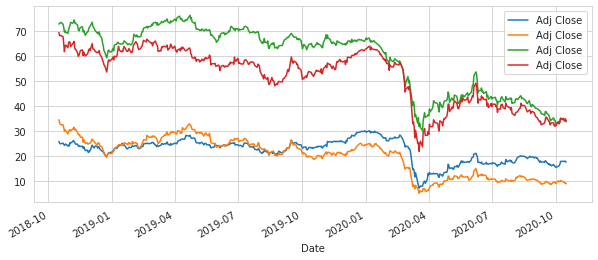

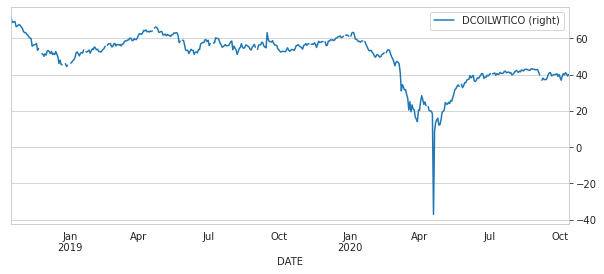

In [323]:
CNQ['Adj Close'].plot(legend=True, figsize=(10,4))
DVN['Adj Close'].plot(legend=True, figsize=(10,4))
XOM['Adj Close'].plot(legend=True, figsize=(10,4))
COP['Adj Close'].plot(legend=True, figsize=(10,4))
WTI.plot(legend=True, figsize=(10,4),ylim=(10,70),secondary_y=True)

<AxesSubplot:label='8548e628-298d-4e83-adf3-93b9081abd13'>

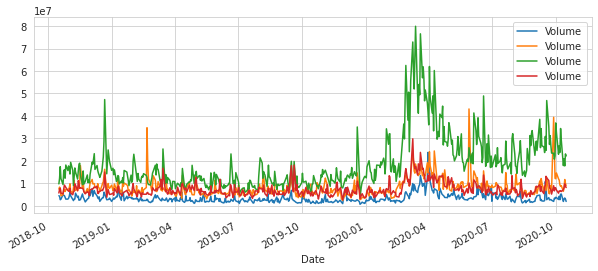

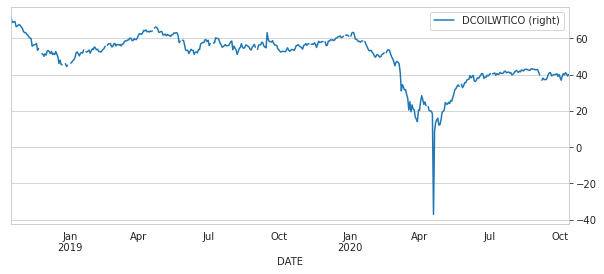

In [324]:
CNQ['Volume'].plot(legend=True, figsize=(10,4))
DVN['Volume'].plot(legend=True, figsize=(10,4))
XOM['Volume'].plot(legend=True, figsize=(10,4))
COP['Volume'].plot(legend=True, figsize=(10,4))
WTI.plot(legend=True, figsize=(10,4),ylim=(10,70),secondary_y=True)

In [325]:
#calculate rolling means of differing imtervals, centered

ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    CNQ[column_name]=CNQ['Adj Close'].rolling(ma,center=True).mean()
    
    
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    XOM[column_name]=XOM['Adj Close'].rolling(ma,center=True).mean()
    
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    COP[column_name]=COP['Adj Close'].rolling(ma,center=True).mean()
    
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    DVN[column_name]=DVN['Adj Close'].rolling(ma,center=True).mean()
    

In [326]:
CNQ.head(20)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-10-16,29.450001,28.809999,28.850000,29.350000,4500900.0,25.883272,NaN,NaN,NaN
2018-10-17,29.240000,28.420000,29.240000,28.639999,4300700.0,25.257135,NaN,NaN,NaN
2018-10-18,28.350000,27.959999,28.309999,28.309999,2715500.0,24.966116,NaN,NaN,NaN
2018-10-19,28.700001,28.309999,28.360001,28.340000,2974200.0,24.992571,NaN,NaN,NaN
2018-10-22,28.790001,28.120001,28.370001,28.600000,5083500.0,25.221861,NaN,NaN,NaN
2018-10-23,28.260000,27.530001,28.000000,28.120001,4664700.0,24.798559,24.899092,NaN,NaN
2018-10-24,28.650000,27.580000,28.410000,27.580000,4557300.0,24.322336,24.754463,NaN,NaN
2018-10-25,28.420000,27.680000,27.840000,27.959999,3786900.0,24.657455,24.638054,NaN,NaN
2018-10-26,28.370001,27.410000,27.660000,28.190001,3003300.0,24.860291,24.690967,NaN,NaN


<AxesSubplot:xlabel='Date'>

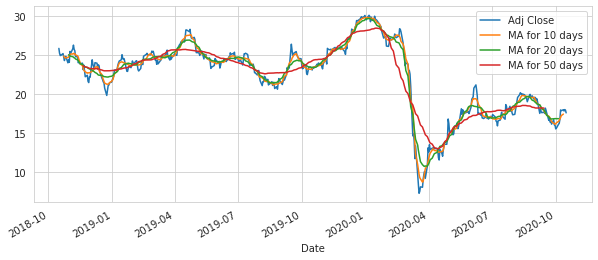

In [327]:
CNQ[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

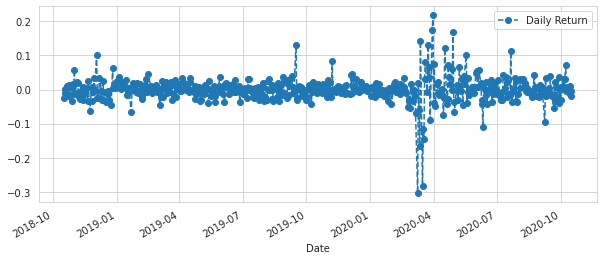

In [328]:
CNQ['Daily Return']=CNQ['Adj Close'].pct_change()
DVN['Daily Return']=DVN['Adj Close'].pct_change()
COP['Daily Return']=COP['Adj Close'].pct_change()
XOM['Daily Return']=XOM['Adj Close'].pct_change()

CNQ['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

In [329]:
CNQ.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-10-16,29.450001,28.809999,28.850000,29.350000,4500900.0,25.883272,NaN,NaN,NaN,NaN
2018-10-17,29.240000,28.420000,29.240000,28.639999,4300700.0,25.257135,NaN,NaN,NaN,-0.024191
2018-10-18,28.350000,27.959999,28.309999,28.309999,2715500.0,24.966116,NaN,NaN,NaN,-0.011522
2018-10-19,28.700001,28.309999,28.360001,28.340000,2974200.0,24.992571,NaN,NaN,NaN,0.001060
2018-10-22,28.790001,28.120001,28.370001,28.600000,5083500.0,25.221861,NaN,NaN,NaN,0.009174


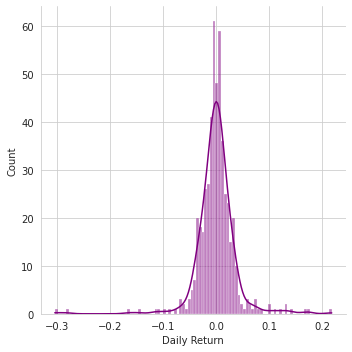

In [330]:
sns.displot(data=CNQ,x='Daily Return',kind='hist',kde=True,bins=100,color='purple')

<AxesSubplot:>

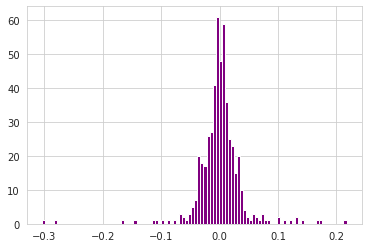

In [331]:
CNQ['Daily Return'].hist(bins=100,color='purple')

In [332]:
closing_df= pdr.DataReader(oil_comp,'yahoo',start=start, end=end)['Adj Close']

In [333]:
closing_df.head()

Symbols,CNQ,DVN,COP,XOM
Date,,,,
2018-10-16,25.883272,34.574364,69.399635,72.751678
2018-10-17,25.257135,33.567329,68.158333,73.020470
2018-10-18,24.966116,32.728146,68.261765,73.334038
2018-10-19,24.992571,32.578964,68.167740,73.441559
2018-10-22,25.221861,32.513699,67.753967,72.706879


In [334]:
oil_rets=closing_df.pct_change()

In [335]:
oil_rets.head()

Symbols,CNQ,DVN,COP,XOM
Date,,,,
2018-10-16,NaN,NaN,NaN,NaN
2018-10-17,-0.024191,-0.029127,-0.017886,0.003695
2018-10-18,-0.011522,-0.025000,0.001518,0.004294
2018-10-19,0.001060,-0.004558,-0.001377,0.001466
2018-10-22,0.009174,-0.002003,-0.006070,-0.010004


In [336]:
closing_df['WTI']=WTI

In [337]:
oil_rets['WTI']=WTI

In [338]:
oil_rets.head()

Symbols,CNQ,DVN,COP,XOM,WTI
Date,,,,,
2018-10-16,NaN,NaN,NaN,NaN,71.93
2018-10-17,-0.024191,-0.029127,-0.017886,0.003695,69.63
2018-10-18,-0.011522,-0.025000,0.001518,0.004294,68.63
2018-10-19,0.001060,-0.004558,-0.001377,0.001466,69.16
2018-10-22,0.009174,-0.002003,-0.006070,-0.010004,69.25


In [339]:
WTI.head()

,DCOILWTICO
DATE,
2018-10-16,71.93
2018-10-17,69.63
2018-10-18,68.63
2018-10-19,69.16
2018-10-22,69.25


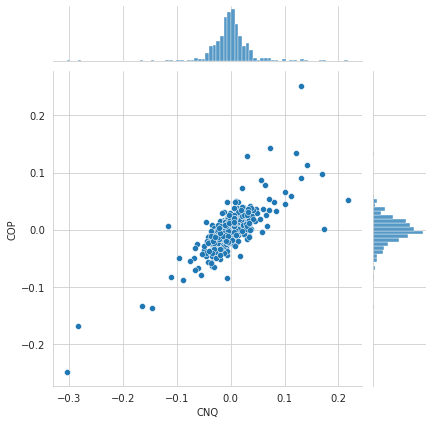

In [340]:
sns.jointplot(data=oil_rets,x='CNQ',y='COP',kind='scatter')

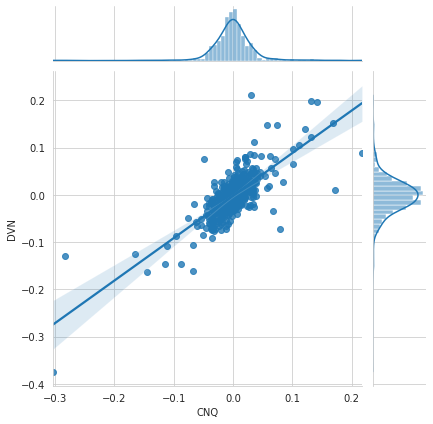

In [341]:
sns.jointplot(data=oil_rets,x='CNQ',y='DVN',kind='reg')


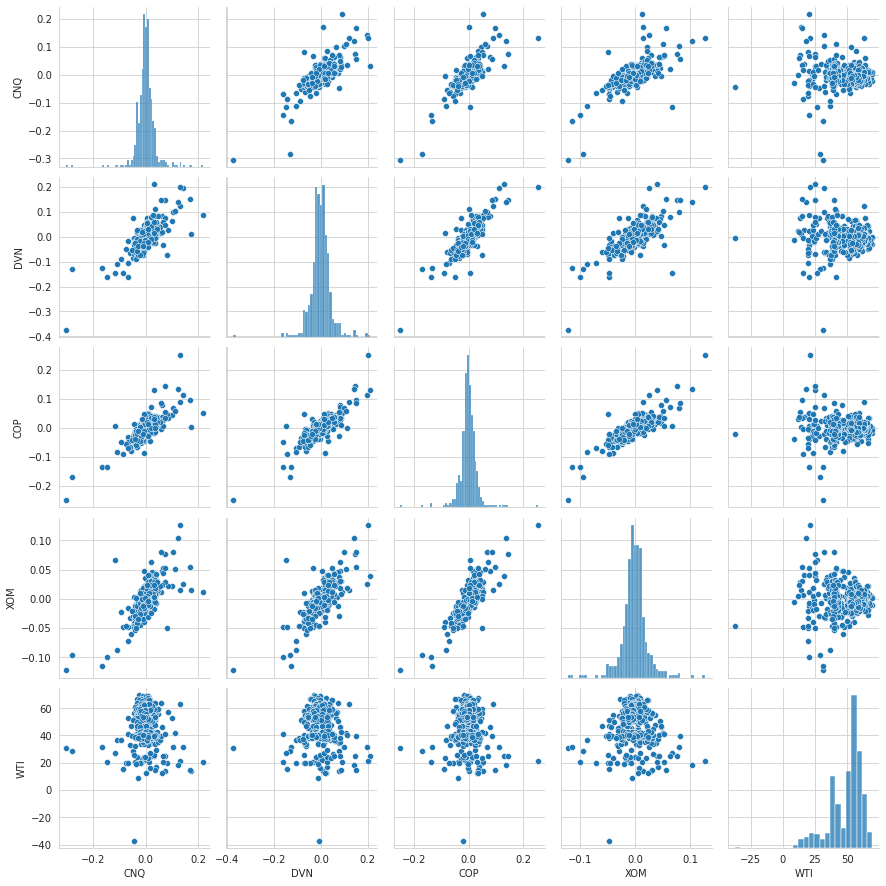

In [342]:
sns.pairplot(data=oil_rets.dropna())

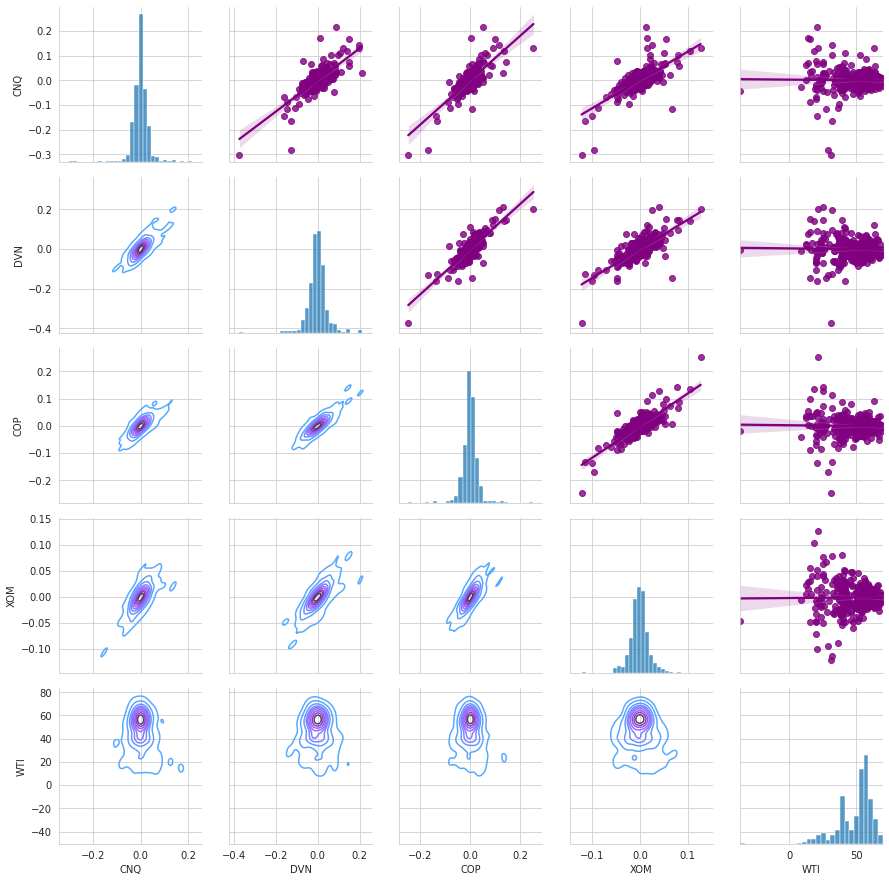

In [343]:
returns_fig = sns.PairGrid(oil_rets.dropna())
returns_fig.map_upper(sns.regplot,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)


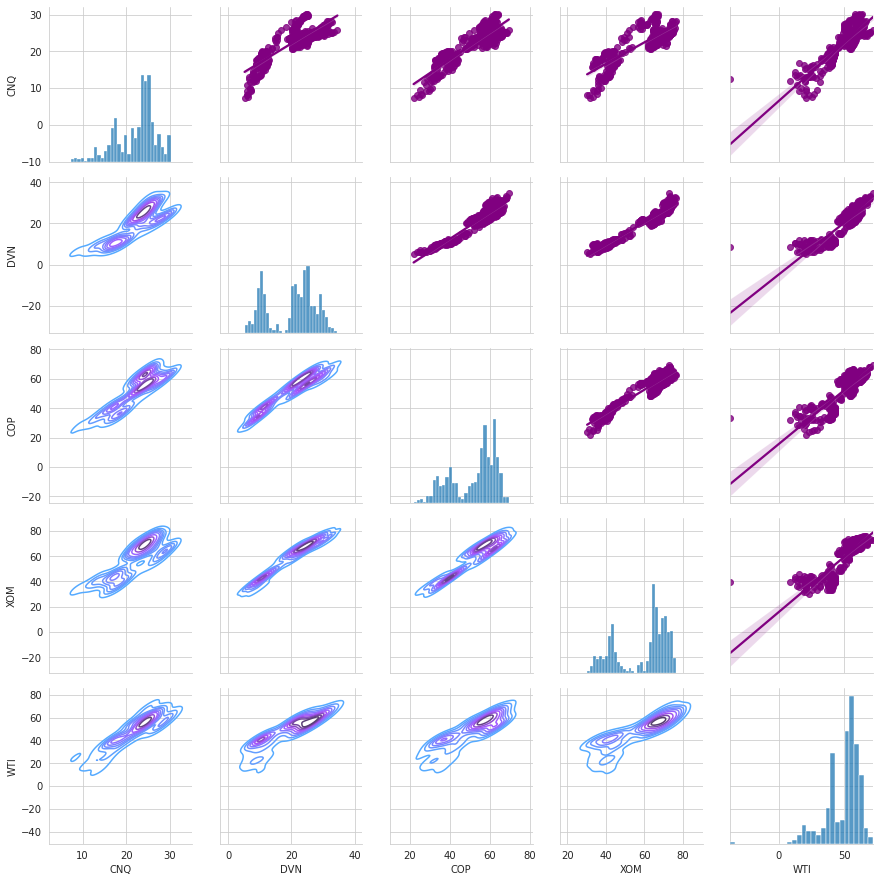

In [344]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(sns.regplot,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(sns.histplot,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

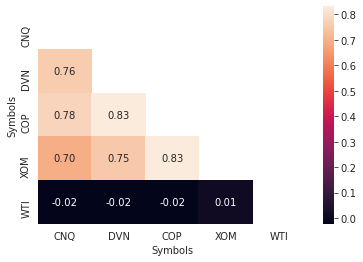

In [345]:
#how to replicate a simple corrplot with 4 lines of code instead of one. Facepalm.
oil_rets_cor=oil_rets.dropna().corr()
mask=np.zeros_like(oil_rets_cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(oil_rets_cor, annot=True, fmt='.2f', mask=mask)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

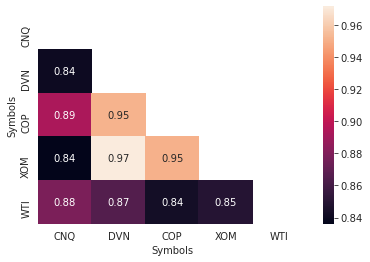

In [346]:
#how to replicate a simple corrplot with 4 lines of code instead of one. Facepalm.
closing_cor=closing_df.dropna().corr()
mask=np.zeros_like(closing_cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(closing_cor, annot=True, fmt='.2f', mask=mask)

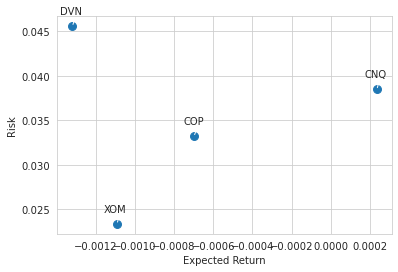

In [347]:
#risk = std dev of daily returns, expected return = mean of daily returns

rets=oil_rets.dropna()
rets=rets.drop('WTI',axis=1) #wti isnt a stock, plots as a massive outlier
area=np.pi*20
plt.scatter(x=rets.mean(),y=rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(10,10),#changes the offset distance of the label
        textcoords='offset points', ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

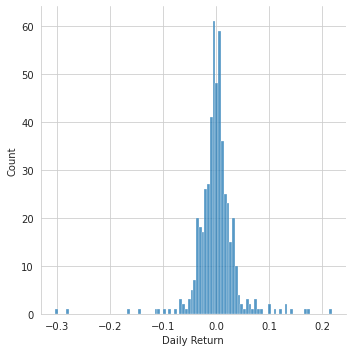

In [348]:
sns.displot(CNQ['Daily Return'].dropna(),bins=100)

In [349]:
rets['CNQ'].quantile(0.05)#the quantile at 95% confidence interval. Value at risk

-0.0399437811153619

In [350]:
rets['COP'].quantile(0.05)

-0.04101630711805218

In [351]:
rets['XOM'].quantile(0.05)

-0.03447480323026911

In [352]:
rets['DVN'].quantile(0.05)

-0.06536615009350188

In [353]:
days=365
dt=1/days
mu=rets.mean()['CNQ']#average daily return
sigma=rets.std()['CNQ']#volatility


In [354]:
def stock_monte_carlo(start_price,days,mu,sigma):
        price=np.zeros(days) #an array of zeros with the length of days, in this case 365
        price[0]=start_price
        
        shock=np.zeros(days)
        drift=np.zeros(days)
        
        for x in range(1,days):
            shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt)) #assumes normality, there are other ways
            drift[x]=mu*dt
            price[x]=price[x-1]+(price[x-1])*(drift[x]+shock[x])
        return price
    

In [355]:
CNQ.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-10-16,29.450001,28.809999,28.850000,29.350000,4500900.0,25.883272,NaN,NaN,NaN,NaN
2018-10-17,29.240000,28.420000,29.240000,28.639999,4300700.0,25.257135,NaN,NaN,NaN,-0.024191
2018-10-18,28.350000,27.959999,28.309999,28.309999,2715500.0,24.966116,NaN,NaN,NaN,-0.011522
2018-10-19,28.700001,28.309999,28.360001,28.340000,2974200.0,24.992571,NaN,NaN,NaN,0.001060
2018-10-22,28.790001,28.120001,28.370001,28.600000,5083500.0,25.221861,NaN,NaN,NaN,0.009174


Text(0.5, 1.0, 'Monte Carlo Analysis for CNRL')

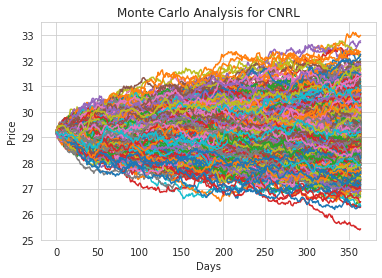

In [356]:
start_price=29.209999
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for CNRL')

In [357]:
runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for CNRL Stock after 365 days')

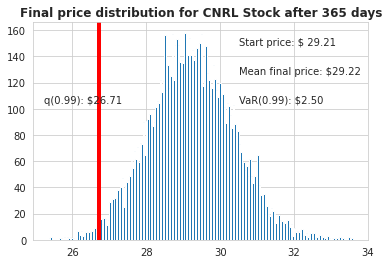

In [364]:
q=np.percentile(simulations,1)#1 percent quantile
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, 'Start price:'' $ %.2f' %start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' %(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' %q)

plt.axvline(x=q, linewidth=4,color='r')
plt.title(u'Final price distribution for CNRL Stock after %s days'% days, weight='bold')

Text(0.5, 1.0, 'Monte Carlo Analysis for DVN')

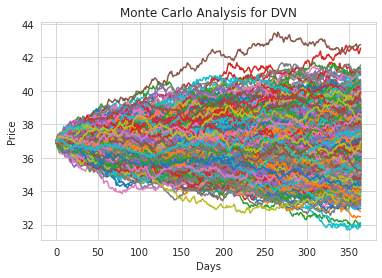

In [371]:
#  same for Devon
days=365
dt=1/days
mu=rets.mean()['DVN']#average daily return
sigma=rets.std()['DVN']#volatility


start_price=36.959999
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for DVN')

In [372]:
runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Devon Stock after 365 days')

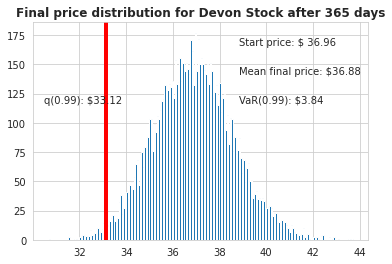

In [373]:
q=np.percentile(simulations,1)#1 percent quantile
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, 'Start price:'' $ %.2f' %start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' %(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' %q)

plt.axvline(x=q, linewidth=4,color='r')
plt.title(u'Final price distribution for Devon Stock after %s days'% days, weight='bold')